In [1]:
import cv2
import os
import tensorflow as tf
from tensorflow import keras
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import normalize
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.utils import to_categorical


In [2]:
image_directory='E://Dataset//'

In [3]:
no_tumor_images=os.listdir(image_directory+ 'no//')
yes_tumor_images=os.listdir(image_directory+ 'yes//')
dataset=[]
label=[]

In [4]:
INPUT_SIZE=64
for i , image_name in enumerate(no_tumor_images):
    if(image_name.split('.')[1]=='jpg'):
        image=cv2.imread(image_directory+'no/'+image_name)
        image=Image.fromarray(image,'RGB')
        image=image.resize((INPUT_SIZE,INPUT_SIZE))
        dataset.append(np.array(image))
        label.append(0)

In [5]:
for i , image_name in enumerate(yes_tumor_images):
    if(image_name.split('.')[1]=='jpg'):
        image=cv2.imread(image_directory+'yes/'+image_name)
        image=Image.fromarray(image, 'RGB')
        image=image.resize((INPUT_SIZE,INPUT_SIZE))
        dataset.append(np.array(image))
        label.append(1)

In [6]:
dataset=np.array(dataset)
label=np.array(label)


x_train, x_test, y_train, y_test=train_test_split(dataset, label, test_size=0.2, random_state=0)

In [7]:
x_train=normalize(x_train, axis=1)
x_test=normalize(x_test, axis=1)

y_train=to_categorical(y_train , num_classes=2)
y_test=to_categorical(y_test , num_classes=2)


In [8]:
model=Sequential()

model.add(Conv2D(32, (3,3), input_shape=(INPUT_SIZE, INPUT_SIZE, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3,3), kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(64, (3,3), kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 activation (Activation)     (None, 62, 62, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 29, 29, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                    

In [10]:
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [11]:
history=model.fit(x_train, y_train, 
batch_size=16, 
verbose=1, epochs=10, 
validation_data=(x_test, y_test),
shuffle=False)

Epoch 1/10
151/151 [==============================] - 11s 56ms/step - loss: 0.5864 - accuracy: 0.7042 - val_loss: 0.4693 - val_accuracy: 0.7837
Epoch 2/10
151/151 [==============================] - 10s 67ms/step - loss: 0.4457 - accuracy: 0.8012 - val_loss: 0.3496 - val_accuracy: 0.8469
Epoch 3/10
151/151 [==============================] - 9s 62ms/step - loss: 0.3632 - accuracy: 0.8482 - val_loss: 0.2908 - val_accuracy: 0.8785
Epoch 4/10
151/151 [==============================] - 12s 78ms/step - loss: 0.2850 - accuracy: 0.8927 - val_loss: 0.2231 - val_accuracy: 0.9135
Epoch 5/10
151/151 [==============================] - 12s 80ms/step - loss: 0.2257 - accuracy: 0.9214 - val_loss: 0.1900 - val_accuracy: 0.9185
Epoch 6/10
151/151 [==============================] - 7s 49ms/step - loss: 0.1733 - accuracy: 0.9405 - val_loss: 0.1509 - val_accuracy: 0.9418
Epoch 7/10
151/151 [==============================] - 7s 48ms/step - loss: 0.1223 - accuracy: 0.9576 - val_loss: 0.1308 - val_accuracy: 0.

In [12]:
#tf.keras.models.save_model(model,'brain_tumor.hdf5')

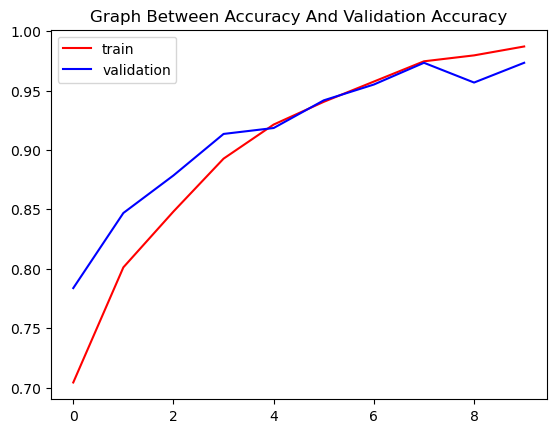

In [17]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.title('Graph Between Accuracy And Validation Accuracy')
plt.legend()
plt.show()

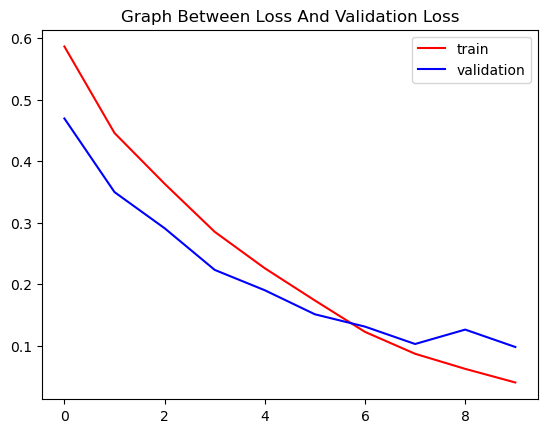

In [16]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.title('Graph Between Loss And Validation Loss')
plt.legend()
plt.show()

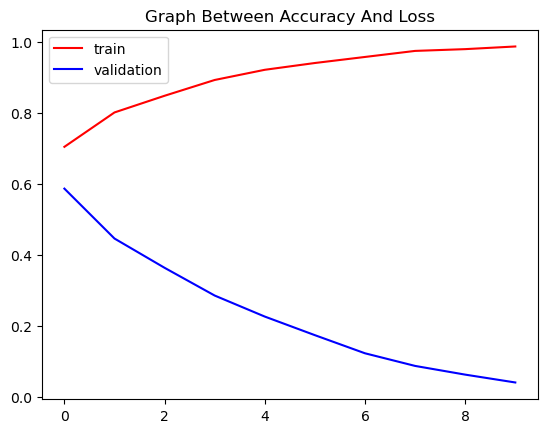

In [19]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['loss'],color='blue',label='validation')
plt.title('Graph Between Accuracy And Loss')
plt.legend()
plt.show()

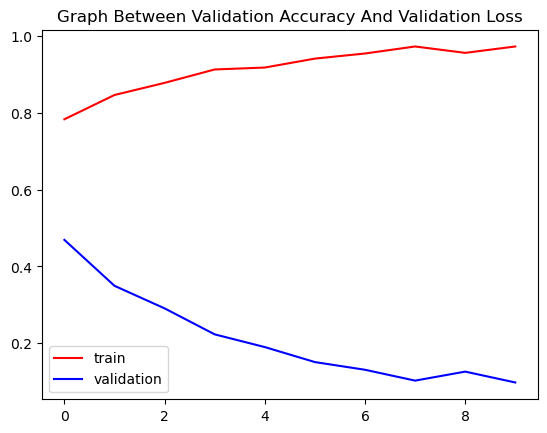

In [21]:
plt.plot(history.history['val_accuracy'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.title('Graph Between Validation Accuracy And Validation Loss')
plt.legend()
plt.show()